# OpenCV教程

## 软件安装

In [1]:
# 导入魔法命令
%run helper.py

# 内联图片
%matplotlib inline

In [2]:
print(cv.__version__)

4.7.0

In [3]:
# matplotlib字体设置

# 打印当前字体
print(plt.rcParams["font.family"])
print(plt.rcParams['font.sans-serif'])


['Source Han Serif CN']

[
    'DejaVu Sans',
    'Bitstream Vera Sans',
    'Computer Modern Sans Serif',
    'Lucida Grande',
    'Verdana',
    'Geneva',
    'Lucid',
    'Arial',
    'Helvetica',
    'Avant Garde',
    'sans-serif'
]

下面执行摄像头打开
```shell
ls /dev/video*
```
查看设备号

如果打开失败,linux上可能是权限的问题,

```shell
sudo usermod -a -G video $USER
```

## 数据捕获

In [4]:
# 打开摄像头获取数据
cap = cv.VideoCapture(0)

# 执行数据捕获
while(1):
    # 获取一帧数据
    ret, frame = cap.read()
    break
cap.release()

# 此时可以直接将上面的操作整理到魔术方法
# 最终的版本位于helper.py的文件中

In [5]:
# 打开摄像头获取数据
cap = cv.VideoCapture(0)

# 执行数据捕获
while(1):
    # 获取一帧数据
    ret, frame = cap.read()
    
    # 打印frame内容
    print(frame)
    
    break
cap.release()

[[[22 31 25]
  [21 30 24]
  [19 29 25]
  ...
  [ 0  2  0]
  [ 0  2  0]
  [ 0  2  0]]

 [[20 30 26]
  [19 29 25]
  [21 31 28]
  ...
  [ 0  2  0]
  [ 0  2  0]
  [ 0  2  0]]

 [[19 29 25]
  [19 29 25]
  [23 31 28]
  ...
  [ 0  2  0]
  [ 0  2  0]
  [ 0  2  0]]

 ...

 [[13 22 14]
  [14 23 15]
  [11 22 11]
  ...
  [ 0  3  0]
  [ 0  4  0]
  [ 0  4  0]]

 [[11 21 13]
  [16 26 17]
  [ 9 22 11]
  ...
  [ 0  3  0]
  [ 0  4  0]
  [ 0  4  0]]

 [[13 21 15]
  [10 19 13]
  [11 22 11]
  ...
  [ 0  4  0]
  [ 0  4  0]
  [ 0  4  0]]]

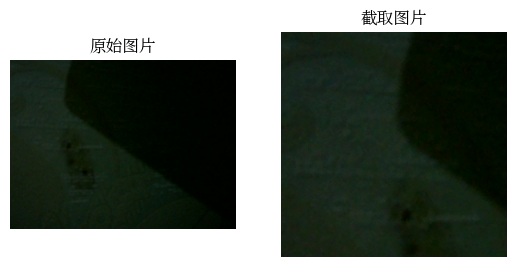

In [6]:
# 打开摄像头获取一帧数据
rawFrame = getFrame()
    
# 截取部分数据
cutFrame = rawFrame[0:300, 0:300]

frame = [rawFrame, cutFrame]
title = ['原始图片', '截取图片']

display2Frame(frame, title)

In [7]:
# 颜色通道提取
frame = getFrame()

b, g, r = cv.split(frame)
print("blue", b)
print("green", g)
print("red", r)

print("blue", b.shape)
print("green", g.shape)
print("red", r.shape)

# 合并RGB
frame = cv.merge((b, g, r))

blue [[29 28 29 ...  0  0  0]
 [27 25 27 ...  0  0  0]
 [23 23 25 ...  0  0  0]
 ...
 [ 7 10 10 ...  0  0  0]
 [ 7  7  9 ...  0  0  0]
 [12 13 11 ...  0  0  0]]

green [[32 31 32 ...  2  2  2]
 [34 31 33 ...  2  2  2]
 [34 34 33 ...  2  2  2]
 ...
 [22 24 24 ...  3  3  3]
 [22 22 24 ...  3  3  3]
 [25 27 25 ...  4  4  4]]

red [[23 22 23 ...  0  0  0]
 [21 19 23 ...  0  0  0]
 [21 21 23 ...  0  0  0]
 ...
 [13 15 15 ...  0  0  0]
 [13 13 12 ...  0  0  0]
 [12 13  9 ...  0  0  0]]

blue
(480, 640)

green
(480, 640)

red
(480, 640)

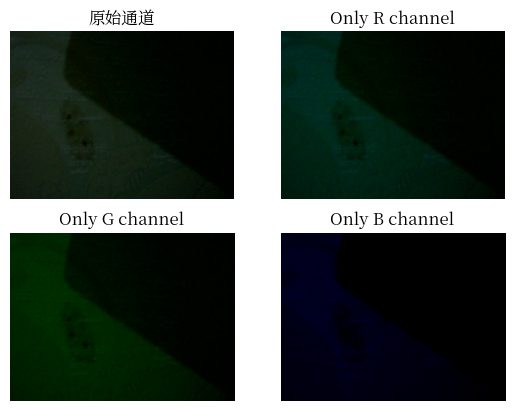

In [8]:
# 只保留某一个通道

# 打开原始文件
rawFrame = getFrame()

# 1. 只保留R通道
redImage = rawFrame.copy()
# redImage[:,:,0] = 0 
# redImage[:,:,1] = 0
redImage[:,:,2] = 0

# 2. 只保留G通道
greenImage = rawFrame.copy()
greenImage[:,:,0] = 0
#greenImage[:,:,1] = 0
greenImage[:,:,2] = 0

# 3. 只保留B通道
blueImage = rawFrame.copy()
#blueImage[:,:,0] = 0
blueImage[:,:,1] = 0
blueImage[:,:,2] = 0

display4Frame([rawFrame, redImage, greenImage, blueImage], ['原始通道', 'Only R channel', 'Only G channel', 'Only B channel'])

## 边界填充

边界填充使用的函数`copyMakeBorder`


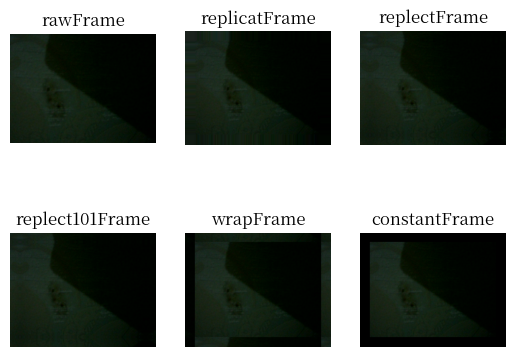

In [9]:
# 获取一帧原始数据
rawFrame = getFrame()

# 执行边界填充
size = (50, 50, 50, 50)

# 复制法
replicatFrame = cv.copyMakeBorder(rawFrame, size[0], size[1], size[2], size[3], cv.BORDER_REPLICATE)

# 反射法
replectFrame = cv.copyMakeBorder(rawFrame, size[0], size[1], size[2], size[3], cv.BORDER_REFLECT)

# 反射101
replect101Frame = cv.copyMakeBorder(rawFrame, size[0], size[1], size[2], size[3], cv.BORDER_REFLECT_101)

# 外包装
wrapFrame = cv.copyMakeBorder(rawFrame, size[0], size[1], size[2], size[3], cv.BORDER_WRAP)

# 常量法
constantFrame = cv.copyMakeBorder(rawFrame, size[0], size[1], size[2], size[3], cv.BORDER_CONSTANT)

display6Frame([rawFrame, replicatFrame, replectFrame, replect101Frame, wrapFrame, constantFrame], 
             ['rawFrame', 'replicatFrame', 'replectFrame', 'replect101Frame', 'wrapFrame', 'constantFrame'])

## 数据计算

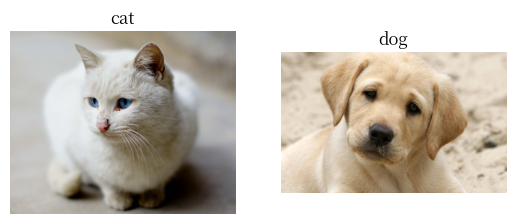

In [10]:
# 加载图片
img_cat = cv.imread("pic/cat.jpg")
img_dog = cv.imread("pic/dog.jpg")

# 执行显示
display2Frame([img_cat, img_dog], ["cat", "dog"])

[[196 196 196 ... 134 134 135]
 [196 196 196 ... 134 134 134]
 [196 196 196 ... 134 134 134]
 [196 196 196 ... 134 134 133]
 [196 196 196 ... 134 133 133]]

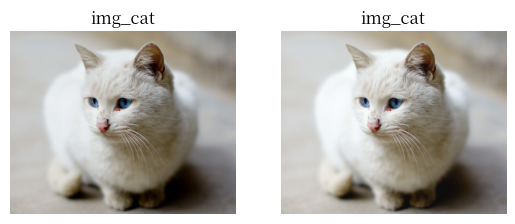

In [11]:
# 图片加数
img_cat2 = img_cat + 12
print(img_cat2[:5, :, 0])   # 开始行:结束行, 开始列:结束列, 通道
display2Frame([img_cat, img_cat2], ["img_cat", "img_cat"])

In [12]:
# 直接相加,此时肯定发生了溢出
(img_cat + img_cat)[:5, :, 0] # % 256

array([[112, 112, 112, ..., 244, 244, 246],
       [112, 112, 112, ..., 244, 244, 244],
       [112, 112, 112, ..., 244, 244, 244],
       [112, 112, 112, ..., 244, 244, 242],
       [112, 112, 112, ..., 244, 242, 242]], dtype=uint8)

In [13]:
# 操纵函数,发生溢出则保存最大值
cv.add(img_cat, img_cat)[:5, :, 0]

array([[255, 255, 255, ..., 244, 244, 246],
       [255, 255, 255, ..., 244, 244, 244],
       [255, 255, 255, ..., 244, 244, 244],
       [255, 255, 255, ..., 244, 244, 242],
       [255, 255, 255, ..., 244, 242, 242]], dtype=uint8)

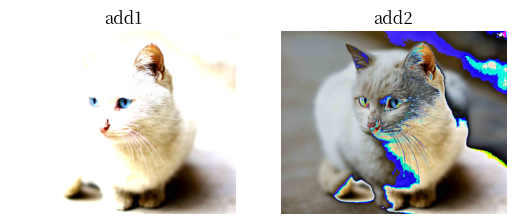

In [14]:
# 展示一下情况
display2Frame([cv.add(img_cat, img_cat), (img_cat + img_cat)], ["add1", "add2"])

## 图像融合

In [15]:
# 直接相加是会发生异常的, 需要resize
print("cat shape", img_cat.shape)
print("dog shape", img_dog.shape)

cat shape
(1609, 1982, 3)

dog shape
(797, 1275, 3)

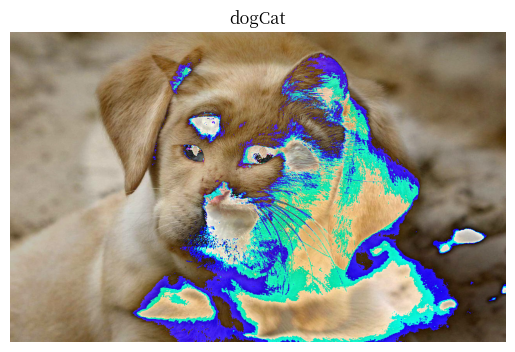

In [16]:
displayFrame(cv.resize(img_cat, (1275, 797)) + img_dog, "dogCat")

## 图像阈值

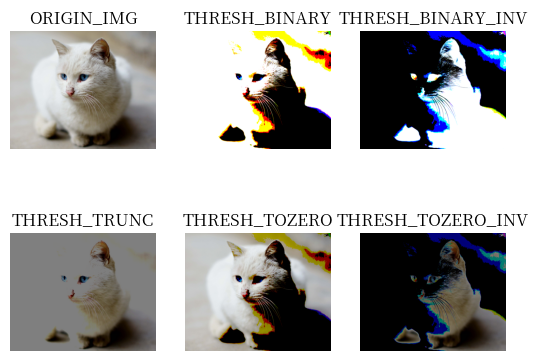

In [17]:
# 阈值操作
ret, threshold1 = cv.threshold(img_cat, 127, 255, cv.THRESH_BINARY)
ret, threshold2 = cv.threshold(img_cat, 127, 255, cv.THRESH_BINARY_INV)
ret, threshold3 = cv.threshold(img_cat, 127, 255, cv.THRESH_TRUNC)
ret, threshold4 = cv.threshold(img_cat, 127, 255, cv.THRESH_TOZERO)
ret, threshold5 = cv.threshold(img_cat, 127, 255, cv.THRESH_TOZERO_INV)

display6Frame([img_cat, threshold1, threshold2, threshold3, threshold4, threshold5], 
              ["ORIGIN_IMG", "THRESH_BINARY", "THRESH_BINARY_INV", "THRESH_TRUNC", "THRESH_TOZERO", "THRESH_TOZERO_INV"])

## 图像平滑处理

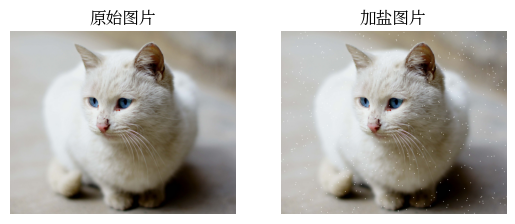

In [18]:
# 处理图片,执行加盐操作

# 噪声个数
dotSize = 500

# 创建一个黑色的图像
img_noise = np.zeros((img_cat.shape[0], img_cat.shape[1], img_cat.shape[2]), np.uint8)

# 创建一些随机值
dotPosX = np.random.randint(0, img_cat.shape[1], size=dotSize)
dotPosY = np.random.randint(0, img_cat.shape[0], size=dotSize)

# 随机在上面打点
for i in range(dotSize):
    cv.circle(img_noise, (dotPosX[i], dotPosY[i]), 3, (255, 255, 255), -1)

# 将原始图片和噪声图片相加
img_noise = cv.add(img_cat, img_noise)

# 展示效果
display2Frame([img_cat, img_noise], ["原始图片", "加盐图片"])

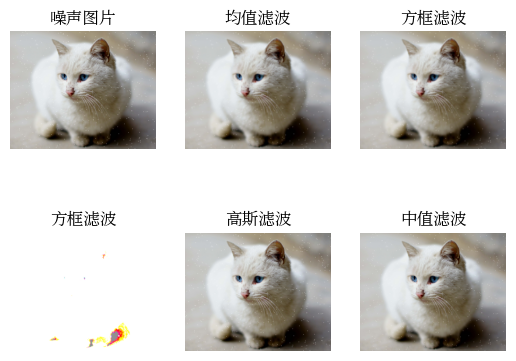

In [19]:
# 图像平滑处理
img_blur = cv.blur(img_noise,(12, 12))
img_box1 = cv.boxFilter(img_noise,-1, (12, 12), normalize=True)
img_box2 = cv.boxFilter(img_noise,-1, (12, 12), normalize=False)
img_gaus = cv.GaussianBlur(img_noise,(5, 5), 1)
img_media = cv.medianBlur(img_noise, 5)

display6Frame([img_noise, img_blur, img_box1, img_box2, img_gaus, img_media], 
              ["噪声图片", "均值滤波", "方框滤波", "方框滤波", "高斯滤波", "中值滤波"])

## 形态学-腐蚀与膨胀操作

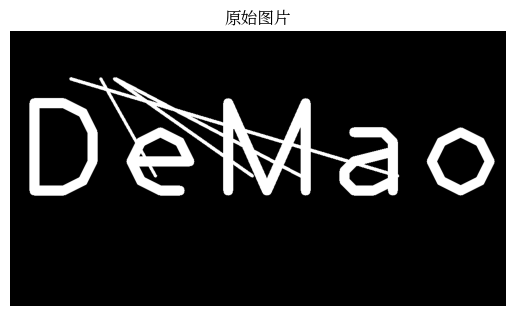

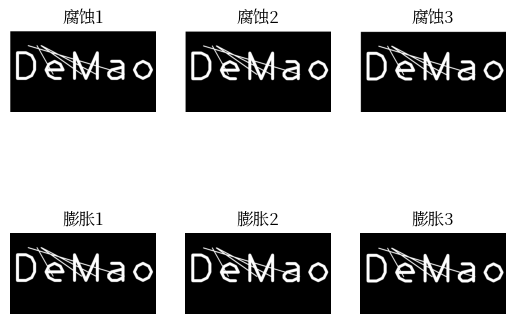

In [42]:
# 构建一张图片
img_origin = np.zeros((568, 1024,3), np.uint8)

# 写个字
cv.putText(img_origin, "DeMao", (10, 350), cv.FONT_HERSHEY_PLAIN, 20.0, (255, 255, 255), 20)

# 添加毛刺(绘制几条直线)
cv.line(img_origin, (125, 100), (800, 300), (255, 255, 255), 5)
cv.line(img_origin, (215, 100), (500, 300), (255, 255, 255), 5)
cv.line(img_origin, (218, 100), (600, 300), (255, 255, 255), 5)
cv.line(img_origin, (187, 100), (300, 300), (255, 255, 255), 5)

displayFrame(img_origin, "原始图片")


kernel = np.zeros((5, 5), np.uint8)

# 执行腐蚀操作
erosion_1 = cv.erode(img_origin, kernel, iterations = 1)
erosion_2 = cv.erode(img_origin, kernel, iterations = 2)
erosion_3 = cv.erode(img_origin, kernel, iterations = 3)

# 执行膨胀操作
dilate_1 = cv.dilate(img_origin, kernel, iterations = 1)
dilate_2 = cv.dilate(img_origin, kernel, iterations = 2)
dilate_3 = cv.dilate(img_origin, kernel, iterations = 3)

display6Frame([erosion_1, erosion_2, erosion_3, dilate_1, dilate_2, dilate_3], 
              ["腐蚀1", "腐蚀2", "腐蚀3", "膨胀1", "膨胀2","膨胀3"])

## 形态学-开运算与闭运算

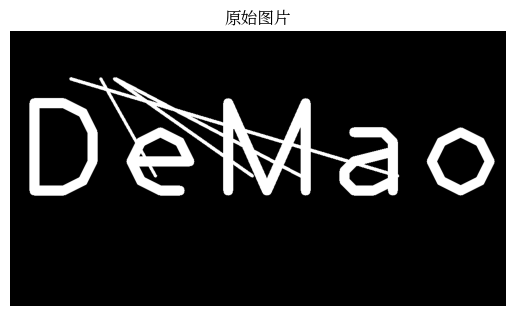

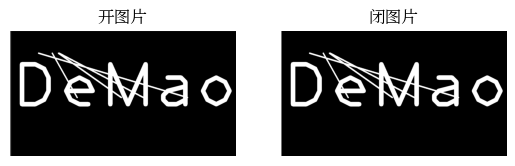

In [43]:
# 开运算 => 先腐蚀后膨胀
# 闭运算 => 先膨胀后腐蚀

# 构建一张图片
img_origin = np.zeros((568, 1024,3), np.uint8)

# 写个字
cv.putText(img_origin, "DeMao", (10, 350), cv.FONT_HERSHEY_PLAIN, 20.0, (255, 255, 255), 20)

# 添加毛刺(绘制几条直线)
cv.line(img_origin, (125, 100), (800, 300), (255, 255, 255), 5)
cv.line(img_origin, (215, 100), (500, 300), (255, 255, 255), 5)
cv.line(img_origin, (218, 100), (600, 300), (255, 255, 255), 5)
cv.line(img_origin, (187, 100), (300, 300), (255, 255, 255), 5)

displayFrame(img_origin, "原始图片")

kernel = np.zeros((5, 5), np.uint8)

img_open = cv.morphologyEx(img_origin, cv.MORPH_OPEN, kernel)
img_close = cv.morphologyEx(img_origin, cv.MORPH_CLOSE, kernel)

display2Frame([img_open, img_close], ["开图片", "闭图片"])

## 梯度计算

In [ ]:
## 